In [1]:
import pandas as pd
from matplotlib import pyplot as plt

### Loading in data

In [2]:
anthropic_df = pd.read_csv("anthropic_python_evals_redo.csv")
df_4_12 = pd.read_csv("anthropic_python_evals_4_14.csv")

In [3]:
df_4_12['response_evaluation'].value_counts()

response_evaluation
CORRECT      34
INCORRECT    10
ERROR         3
Name: count, dtype: int64

In [4]:
df_4_12['response_score'].mean()

0.723404255319149

The mean answer generation time through anthropic is 27.79719329954545


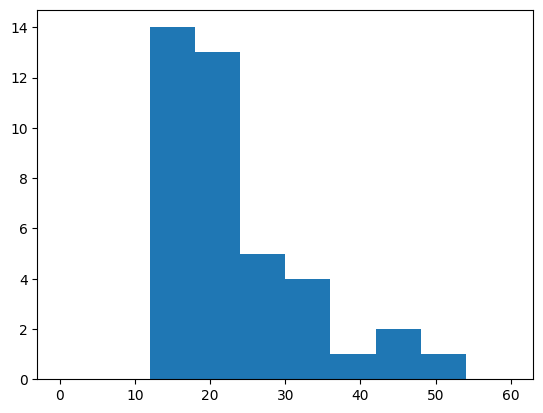

In [12]:
anthropic_no_error_df = df_4_12.where(df_4_12['response_evaluation'] != "ERROR")
print(f"The mean answer generation time through anthropic is {anthropic_no_error_df.loc[:, 'generation_time'].mean()}")
plt.hist(anthropic_no_error_df['generation_time'], range = (0,60))
plt.show()

In [6]:
anthropic_df['response_evaluation'].value_counts()

response_evaluation
CORRECT      17
INCORRECT     9
ERROR         4
Name: count, dtype: int64

The mean answer generation time through anthropic is 30.313879820000004


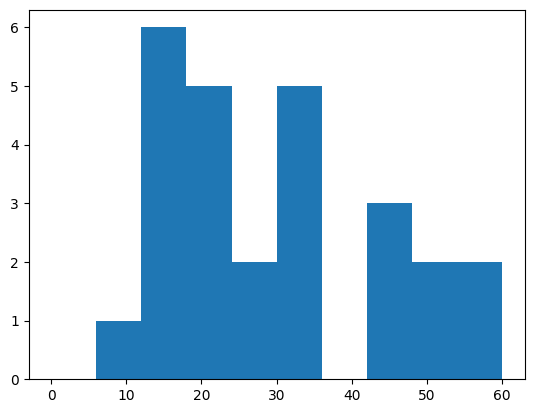

In [7]:
anthropic_no_error_df = anthropic_df.where(anthropic_df['response_evaluation']!= "ERROR")
print(f"The mean answer generation time through anthropic is {anthropic_no_error_df.loc[:, 'generation_time'].mean()}")
plt.hist(anthropic_no_error_df['generation_time'], range = (0,60))
plt.show()

### Preprocessing to combine dfs

In [3]:
combined_df = anthropic_df.rename(
    columns={
        "generation_time": "anthropic_generation_time",
        "mongodb_evaluation": "anthropic_mongodb_evaluation",
        "mongodb_score": "anthropic_mongodb_score",
        "response_evaluation": "anthropic_response_evaluation",
        "response_score": "anthropic_response_score",
    }
)

bedrock_df = bedrock_df.rename(
    columns={
        "generation_time": "bedrock_generation_time",
        "mongodb_evaluation": "bedrock_mongodb_evaluation",
        "mongodb_score": "bedrock_mongodb_score",
        "response_evaluation": "bedrock_response_evaluation",
        "response_score": "bedrock_response_score",
    }
)

combined_df["bedrock_generation_time"] = bedrock_df["bedrock_generation_time"]
combined_df["bedrock_mongodb_evaluation"] = bedrock_df["bedrock_mongodb_evaluation"]
combined_df["bedrock_mongodb_score"] = bedrock_df["bedrock_mongodb_score"]
combined_df["bedrock_response_evaluation"] = bedrock_df["bedrock_response_evaluation"]
combined_df["bedrock_response_score"] = bedrock_df["bedrock_response_score"]

combined_df.head(5)

,input_question,target_mongodb_query,target_answer,predicted_answer,predicted_mongodb_query,anthropic_generation_time,anthropic_mongodb_evaluation,anthropic_mongodb_score,anthropic_response_evaluation,anthropic_response_score,bedrock_generation_time,bedrock_mongodb_evaluation,bedrock_mongodb_score,bedrock_response_evaluation,bedrock_response_score
0,for mouse 721291 can you make a table of sessi...,"{""filter"":{""subject.subject_id"":""721291""},""pro...","Sessions for Mouse 721291\n Session, Date, Ses...",I'll create an aggregation pipeline to retriev...,"{'filter': {'subject.subject_id': '721291'}, '...",45.258800,CORRECT,1.0,INCORRECT,0.0,27.374631,CORRECT,1.0,INCORRECT,0.0
1,Tell me about mouse 747107,"{""subject.subject_id"": ""747107""}",Mouse 747107 is a female Mus musculus with the...,I'll help you retrieve the details for mouse 7...,"{'filter': {'subject.subject_id': '747107'}, '...",11.560473,CORRECT,1.0,INCORRECT,0.0,21.749024,CORRECT,1.0,CORRECT,1.0
2,How many records use the session.data_streams....,"{""agg_pipeline"":[{""$match"":{""session.data_stre...",there are 5488 records with session.data_strea...,Here's a query to count records that have a no...,{'agg_pipeline': [{'$match': {'session.data_st...,10.611998,CORRECT,1.0,CORRECT,1.0,19.400605,CORRECT,1.0,CORRECT,1.0
3,can you tell me how many sessions exist for 77...,"filter = {""subject.subject_id"": ""775745""}\npro...",There are 50 sessions for subject 775745,I'll help you count the number of sessions for...,{'agg_pipeline': [{'$match': {'subject.subject...,10.799716,CORRECT,1.0,INCORRECT,0.0,15.529134,CORRECT,1.0,INCORRECT,0.0
4,Find how many experimental sessions conducted ...,"{""agg_pipeline"":[{""$match"":{""$or"":[{""acquisiti...",86 sessions were conducted by Marton Rozsa,"Error: Error code: 400 - {'type': 'error', 'er...","Error: Error code: 400 - {'type': 'error', 'er...",10.799716,ERROR,0.0,ERROR,0.0,15.529134,ERROR,0.0,ERROR,0.0


In [4]:
combined_df.shape

(45, 15)

## Analysis

In [5]:
combined_df['anthropic_mongodb_evaluation'].value_counts()

anthropic_mongodb_evaluation
CORRECT      22
INCORRECT    14
ERROR         9
Name: count, dtype: int64

In [6]:
combined_df['bedrock_mongodb_evaluation'].value_counts()

bedrock_mongodb_evaluation
CORRECT      23
INCORRECT    12
ERROR        10
Name: count, dtype: int64

In [8]:
combined_df['anthropic_response_evaluation'].value_counts()

anthropic_response_evaluation
INCORRECT    31
ERROR         8
CORRECT       6
Name: count, dtype: int64

In [7]:
combined_df['bedrock_response_evaluation'].value_counts()

bedrock_response_evaluation
CORRECT      24
INCORRECT    11
ERROR        10
Name: count, dtype: int64